<a href="https://colab.research.google.com/github/mukkatharun/DimensionalityReductionTechniques/blob/main/DimensionalityReductionTechniquesImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dimensionality Reduction Techniques on Image dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Exploratory Data Analysis (EDA)**

In [97]:
data.shape

(42000, 785)

Label columns shows the digit, which the image data is given. Lets look into a sample image

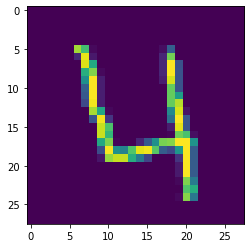

In [4]:
image_sample = data.iloc[3, 1:].to_numpy().reshape(28,28)
plt.imshow(image_sample)

In [5]:
data['label'].unique() # we have total of 10 digits

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [98]:
data = data.groupby('label').head(20)
df = data.loc[ : , data.columns != 'label']
df.shape

(200, 784)

**Principal Component Analysis**

In [99]:
from sklearn.decomposition import PCA
pca = PCA(2)
# fit on data
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2'])
var = data.iloc[:,0].values
principalDf['label']=pd.Series(var)
principalDf.head()

,principal component 1,principal component 2,label
0,-605.521697,515.949462,1
1,1881.957985,536.744546,0
2,-831.062834,221.875007,1
3,-83.382280,-133.988423,4
4,2105.954090,572.549985,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


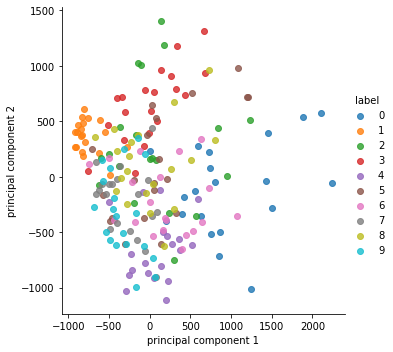

In [100]:
import seaborn as sns
sns.lmplot('principal component 1', 'principal component 2', data=principalDf, hue='label', fit_reg=False)
plt.show()

**singular value decomposition (SVD)**

In [101]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(df)

In [102]:
principalDf = pd.DataFrame(data = svd_data
             , columns = ['svd component 1','svd component 2'])
var = data.iloc[:,0].values
principalDf['label']=pd.Series(var)
principalDf.head()

,svd component 1,svd component 2,label
0,950.364240,-494.918204,1
1,2247.645470,1686.718952,0
2,941.513401,-671.201546,1
3,728.413694,419.333695,4
4,2356.845433,1850.705203,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


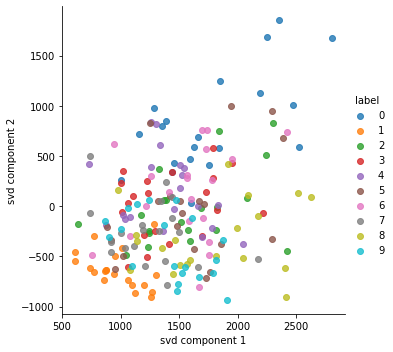

In [103]:
import seaborn as sns
sns.lmplot('svd component 1', 'svd component 2', data=principalDf, hue='label', fit_reg=False)

plt.show()

**Locally Linear Embedding**

In [104]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, eigen_solver='dense')
lle_data = lle.fit_transform(df)

In [105]:
principalDf = pd.DataFrame(data = lle_data
             , columns = ['lle component 1','lle component 2'])
var = data.iloc[:,0].values
principalDf['label']=pd.Series(var)
principalDf.head()

,lle component 1,lle component 2,label
0,-0.088668,-0.013892,1
1,-0.007876,0.310854,0
2,-0.135757,-0.171040,1
3,0.028164,-0.016317,4
4,-0.009507,0.331348,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


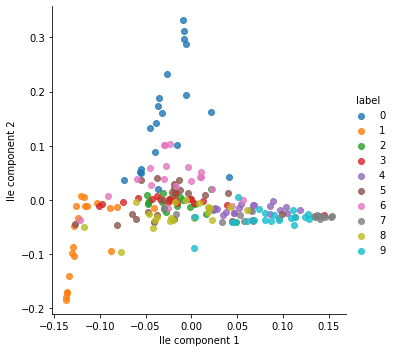

In [106]:
import seaborn as sns 
sns.lmplot('lle component 1', 'lle component 2', data=principalDf, hue='label', fit_reg=False)

plt.show()

**t-distributed stochastic neighbor embedding (tsne)**


In [107]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_data = tsne.fit_transform(df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 668.048674
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.198505
[t-SNE] KL divergence after 300 iterations: 0.915269


In [108]:
principalDf = pd.DataFrame(data = tsne_data
             , columns = ['tsne component 1','tsne component 2'])
var = data.iloc[:,0].values
principalDf['label']=pd.Series(var)
principalDf.head()

,tsne component 1,tsne component 2,label
0,6.691443,2.671229,1
1,-14.703233,-2.600131,0
2,3.074312,6.752697,1
3,0.473104,9.735094,4
4,-14.674109,-2.997865,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


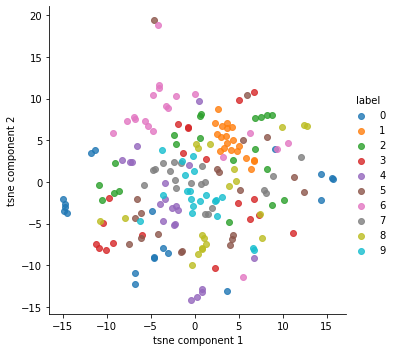

In [109]:
import seaborn as sns 
sns.lmplot('tsne component 1', 'tsne component 2', data=principalDf, hue='label', fit_reg=False)

plt.show()

**Uniform Manifold Approximation and Projection (UMAP)**

In [ ]:
!pip install umap-learn[plot]

In [112]:
import umap
umap_data = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      n_components=2,
                      metric='correlation').fit_transform(df)

In [113]:
principalDf = pd.DataFrame(data = umap_data
             , columns = ['umap component 1','umap component 2'])
var = data.iloc[:,0].values
principalDf['label']=pd.Series(var)
principalDf.head()

,umap component 1,umap component 2,label
0,6.288692,5.858628,1
1,2.593248,0.083988,0
2,10.451421,6.231384,1
3,0.665045,4.318105,4
4,2.865490,-0.272780,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


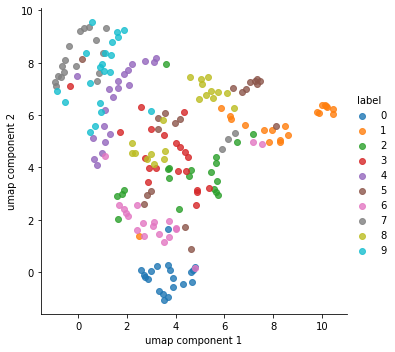

In [114]:
import seaborn as sns 
sns.lmplot('umap component 1', 'umap component 2', data=principalDf, hue='label', fit_reg=False)

plt.show()

**Isometric Mapping (Isomap)**

In [115]:
from sklearn.manifold import Isomap
embed = Isomap(n_components = 2, n_neighbors=5)
isomap_data = embed.fit_transform(df)

In [116]:
principalDf = pd.DataFrame(data = isomap_data
             , columns = ['isomap component 1','isomap component 2'])
var = data.iloc[:,0].values
principalDf['label']=pd.Series(var)
principalDf.head()

,isomap component 1,isomap component 2,label
0,-406.347597,1516.694660,1
1,3414.752867,-2846.183441,0
2,-229.440079,865.555909,1
3,-1363.284765,-2170.920899,4
4,3482.413826,-2438.810046,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


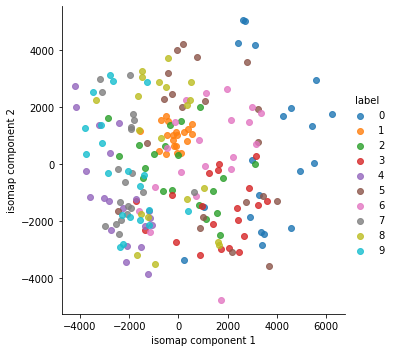

In [117]:
import seaborn as sns 
sns.lmplot('isomap component 1', 'isomap component 2', data=principalDf, hue='label', fit_reg=False)

plt.show()